In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


d21 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2021.csv", sep = ';')
d20 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2020.csv")
d19 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2019.csv", dtype={'franja_horaria': object})
d18 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2018.csv")
d17 = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitos_2017.csv")
dms = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-departamentos-mes-sexo.csv",sep=';', encoding='latin-1')
dept = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-departamentos.csv",sep=';',encoding='latin-1')
prov = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/snic-provincias.csv")
pob = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/caba_pob_barrios_2010.csv")
    
# UNIR VERTICULAMENTE LOS DF de20, d19, d18, d17

# d20.loc[(d20["tipo"] == "Homicidio") & (d20["subtipo"] == "Doloso")]

oliver agrega los km que abrcan el total de cada barrio para hacer un ratio y ser objetivos, no agrego los hbaitantes porque el ultimo censo es de hace 11 años.



Questions: 
    - Time serie de 'Robo (con violencia)', 'Hurto (sin violencia)', 'Lesiones',
       'Homicidio' a traves del tiempo.
    - Estadistica de delitos por comuna y por barrio (Barrios mas peligrosos) box plot barrios.
    - Subtipo de delito mas comun por delito.
    - franja horaria, rango horario mas habitual de cada delito.
    - Meses con mas delitos
Questions 2: 
    - con dms: Correlacion entre sexo masculino y femenino por delito en CIUDAD DE BUENOS AIRES.
    Los demas df se usan para chequear nomas.
   
 Considerar agregar una base de datos con datos sobre la poblacion de la ciudad, para hacer mas analisis estaidsitico.
 

In [2]:
d21['franja'] = d21['franja'].astype(str)

d21['franja'] = d21.franja.apply(lambda s: s+':00:00')

d21.loc[d21.franja == "SD:00:00", 'franja'] = np.nan

d21.loc[d21.franja == "sd:00:00", 'franja'] = np.nan

fechayhora = d21.fecha.str.cat(d21.franja, sep=' ')

d21['fechaco'] = pd.to_datetime(fechayhora)

d21["fecha"] = pd.to_datetime(d21['fecha'], format='%d/%m/%Y')

d21['comuna'] = d21['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['comuna'] = d21['comuna'].apply(convert)

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['cantidad'] = d21['cantidad'].apply(convert)

d21['day'] = pd.DatetimeIndex(d21['fechaco']).day

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d21['day'] = d21['day'].apply(convert)

d21['dia'].replace(['viernes', 'domingo',"Miércoles","miércoles", "lunes", "jueves", "martes", "Sábado","sábado"],
                   ["Viernes","Domingo","Miercoles","Miercoles","Lunes", "Jueves","Martes", "Sabado","Sabado"], inplace=True)

#------------------------

d20['franja'] = d20['franja'].astype(str)

d20['franja'] = d20.franja.apply(lambda s: s+':00:00')

d20.loc[d20.franja == "SD:00:00", 'franja'] = np.nan

d20.loc[d20.franja == "sd:00:00", 'franja'] = np.nan

fechayhora = d20.fecha.str.cat(d20.franja, sep=' ')

d20['fechaco'] = pd.to_datetime(fechayhora)

d20["fecha"] = pd.to_datetime(d20['fecha'])

d20['comuna'] = d20['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['comuna'] = d20['comuna'].apply(convert)

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['victimas'] = d20['victimas'].apply(convert)

d20['day'] = pd.DatetimeIndex(d20['fechaco']).day

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d20['day'] = d20['day'].apply(convert)

d20['dia'].replace(['viernes', 'domingo',"Miércoles", "lunes", "martes", "Sábado"],
                   ["Viernes","Domingo","Miercoles","Lunes","Martes", "Sabado"], inplace=True)

#----------------------------------

d19['fecha'] = pd.to_datetime(d19['fecha'])

d19['months'] = pd.DatetimeIndex(d19['fecha']).month
d19['year'] = pd.DatetimeIndex(d19['fecha']).year
d19['day'] = pd.DatetimeIndex(d19['fecha']).day

d19['mes'] = d19['fecha'].dt.month_name()
d19["dia"] = d19['fecha'].dt.day_name()

d19['dia'].unique()

d19['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d19['mes'].unique()

d19['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)

d19['franja_horaria'] = d19['franja_horaria'].astype(str)

d19['fecha'] = d19['fecha'].astype(str)

d19['franja_horaria'] = d19.franja_horaria.apply(lambda s: s+':00:00')

d19.loc[d19.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d19.loc[d19.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d19.loc[d19.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d19.fecha.str.cat(d19.franja_horaria, sep=' ')

d19['fechaco'] = pd.to_datetime(fechayhora)

d19["fecha"] = pd.to_datetime(d19['fecha'])

d19['comuna'] = d19['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d19['comuna'] = d19['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d19['cantidad_registrada'] = d19['cantidad_registrada'].apply(convert)

#-----------------------------

d18['fecha'] = pd.to_datetime(d18['fecha'])

d18['months'] = pd.DatetimeIndex(d18['fecha']).month
d18['year'] = pd.DatetimeIndex(d18['fecha']).year
d18['day'] = pd.DatetimeIndex(d18['fecha']).day

d18['mes'] = d18['fecha'].dt.month_name()
d18["dia"] = d18['fecha'].dt.day_name()

d18['dia'].unique()

d18['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d18['mes'].unique()

d18['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)


d18['fecha'] = d18['fecha'].astype(str)

d18['franja_horaria'] = d18.franja_horaria.apply(lambda s: s+':00:00')

d18.loc[d18.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d18.loc[d18.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d18.loc[d18.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d18.fecha.str.cat(d18.franja_horaria, sep=' ')

d18['fechaco'] = pd.to_datetime(fechayhora)

d18["fecha"] = pd.to_datetime(d18['fecha'])

d18['comuna'] = d18['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d18['comuna'] = d18['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d18['cantidad_registrada'] = d18['cantidad_registrada'].apply(convert)

#---------------------------------

d17['fecha'] = pd.to_datetime(d17['fecha'])

d17['months'] = pd.DatetimeIndex(d17['fecha']).month
d17['year'] = pd.DatetimeIndex(d17['fecha']).year
d17['day'] = pd.DatetimeIndex(d17['fecha']).day

d17['mes'] = d17['fecha'].dt.month_name()
d17["dia"] = d17['fecha'].dt.day_name()

d17['dia'].unique()

d17['dia'].replace(['Friday', 'Sunday',"Wednesday", "Monday", "Thursday", "Tuesday", "Saturday"],
                   ["Viernes","Domingo","Miercoles","Lunes", "Jueves","Martes", "Sabado"], inplace=True)

d17['mes'].unique()

d17['mes'].replace(['September', 'October', 'November', 'December', 'January','February', 'March', 'April', 'May', 'June', 'July', 'August'],
                   ['Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto'], inplace=True)

d17['fecha'] = d17['fecha'].astype(str)

d17['franja_horaria'] = d17['franja_horaria'].astype(str)

d17['franja_horaria'] = d17.franja_horaria.apply(lambda s: s+':00:00')

d17.loc[d17.franja_horaria == "SD:00:00", 'franja_horaria'] = np.nan

d17.loc[d17.franja_horaria == "S/D:00:00", 'franja_horaria'] = np.nan

d17.loc[d17.franja_horaria == "sd:00:00", 'franja_horaria'] = np.nan

fechayhora = d17.fecha.str.cat(d17.franja_horaria, sep=' ')

d17['fechaco'] = pd.to_datetime(fechayhora)

d17["fecha"] = pd.to_datetime(d17['fecha'])

d17['comuna'] = d17['comuna'].astype("category")

convert = lambda x: '%.0f' % x if isinstance(x,float) else x
d17['comuna'] = d17['comuna'].apply(convert)

convert = lambda x: '%.f' % x if isinstance(x,float) else x
d17['cantidad_registrada'] = d17['cantidad_registrada'].apply(convert)

#----------------------

d17.loc[d17.duplicated() == True]

d18.loc[d18.duplicated() == True]

d19.loc[d19.duplicated() == True]

d20.loc[d20.duplicated() == True]

d21.loc[d21.duplicated() == True]

#-----------------------
d21 = d21.drop(columns=['id-mapa',"day", "uso_armas"])

d20 = d20.drop(columns=['id_mapa',"day", "uso_armas"])

d19 = d19.drop(columns=['id', 'day', "months"])

d18 = d18.drop(columns=['id', 'day', "months"])

d17 = d17.drop(columns=['id', 'day', "months"])

#----------------------
d21.rename(columns={'anio': 'año', 'fechaco': 'fecha_completa', 'franja':'hora', 'latitud':'lat', 'longitud':'long', 'cantidad': 'victimas'}, inplace=True)

d20.rename(columns={'anio': 'año', 'fechaco': 'fecha_completa', 'franja':'hora', 'latitud':'lat', 'longitud':'long'}, inplace=True)

d19.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

d18.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

d17.rename(columns={'tipo_delito': 'tipo', 'fechaco': 'fecha_completa', 'subtipo_delito':'subtipo', 'cantidad_registrada':'victimas', 'year':'año', 'franja_horaria':'hora'}, inplace=True)

#---------------------

fdata = pd.concat([d21, d20, d19, d18, d17], ignore_index=True)

fdata['hora'] = fdata['hora'].astype("category")

fdata['victimas'].replace(['nan'],
                          [1], inplace=True)

#---------------------

fdata.isna().sum()

#--------------------

crimes = fdata['barrio'].value_counts()
crimes.count()

fdata['barrio'].unique()

fdata['barrio'].replace(['Boca', 'Nueva pompeya', 'Villa Del Parque'],
                   ["La Boca","Nueva Pompeya", 'Villa del Parque'], inplace=True)

fdata['victimas'].replace([1],
                   ["1"], inplace=True)

fdata['barrio'].replace(['Boca', 'Nueva pompeya', 'Villa Del Parque'],
                   ["La Boca","Nueva Pompeya", 'Villa del Parque'], inplace=True)

#--------------------

fdata.set_index('fecha_completa', inplace = True)

#---------------------

fdata.loc[fdata['barrio'].isnull(), 'comuna'] = np.nan

#----------------------


pob = pob.rename(columns={'BARRIO':'barrio', 'POBLACION':'Poblacion'})

pob['barrio'] = pob['barrio'].str.title()

pob['barrio'].replace(['Agronomia', 'Constitucion', 'San Cristobal','San Nicolas','Velez Sarsfield','Villa Pueyrredon','Boca','Villa Del Parque'],
                   ['Agronomía', 'Constitución', 'San Cristóbal','San Nicolás','Vélez Sársfield','Villa Pueyrredón','La Boca','Villa del Parque'], inplace=True)


fdata = fdata.reset_index()

fdata = pd.merge(fdata, pob, how = 'left', on = 'barrio')

# ----------------------

fdata["horas"] = fdata.hora.str[:-6]

# ---------------------

fdata = fdata.replace('SD', np.nan, regex=True)
fdata = fdata.replace('nan', np.nan, regex=True)
fdata = fdata.replace('NaN', np.nan, regex=True)

# ---------------------

fdata['lat'] = fdata['lat'].astype(str)

fdata['long'] = fdata['long'].astype(str)

fdata["lat"] = fdata['lat'].str.replace(',','.')

fdata["lat"] = fdata['lat'].str.replace('/','-')

fdata["long"] = fdata['long'].str.replace('/','-')

fdata["long"] = fdata['long'].str.replace(',','.')

fdata['lat'] = fdata['lat'].astype(float)

fdata['long'] = fdata['long'].astype(float)



In [3]:
# Tipo de crimen mas habitual

types = fdata['tipo'].value_counts()

types

Robo (con violencia)     281532
Hurto (sin violencia)    195882
Lesiones                  43524
Homicidio                  1135
Name: tipo, dtype: int64

In [6]:
# Barrio con mas robos

bar = fdata.loc[fdata.tipo == 'Robo (con violencia)']

bar = bar.groupby(by='barrio').agg({"dia":"count"})

maxrob = bar.sort_values(by = 'dia', ascending = False)

maxrob.head(3)

,dia
barrio,
Palermo,21358
Balvanera,18446
Flores,15056


In [7]:
# Barrio con menos robos

minrob = bar.sort_values(by = 'dia', ascending = True)

minrob.head(3)

,dia
barrio,
Puerto Madero,386
Agronomía,915
Parque Chas,918


In [8]:
# Barrio con mas homicidios

hom = fdata.loc[fdata.tipo == 'Homicidio']

hom = hom.groupby(by='barrio').agg({"dia":"count"})

maxh = hom.sort_values(by = 'dia', ascending = False)

maxh.head(3)


,dia
barrio,
Flores,105
Barracas,90
Retiro,75


In [9]:
# Barrio con menos homicidios

minh = hom.sort_values(by = 'dia', ascending = True)

minh.head(3)

,dia
barrio,
Coghlan,1
Villa Real,3
Versalles,3


In [10]:
# Meses con mas delitos

crimes = fdata.groupby(by='mes').agg({"dia":"count"})
maxcrimes = crimes.sort_values(by = 'dia', ascending = False)
maxcrimes.head(3)

,dia
mes,
Enero,47627
Noviembre,47204
Diciembre,46494


In [11]:
# Meses con menos delitos

mincrimes = crimes.sort_values(by = 'dia', ascending = True)
mincrimes.head(3)

,dia
mes,
Abril,8505
Mayo,8993
Junio,10457


In [12]:
fdata.head()

,fecha_completa,año,mes,dia,fecha,hora,tipo,subtipo,barrio,comuna,lat,long,victimas,Poblacion,horas
0,2021-06-01 18:00:00,2021,Enero,Miercoles,2021-01-06,18:00:00,Homicidio,Siniestro Vial,Constitución,1,-34.627610,-58.379146,1,44107.0,18
1,2021-07-01 10:00:00,2021,Enero,Jueves,2021-01-07,10:00:00,Homicidio,Siniestro Vial,Mataderos,9,-34.649730,-58.510590,1,64436.0,10
2,2021-10-01 07:00:00,2021,Enero,Domingo,2021-01-10,7:00:00,Homicidio,Siniestro Vial,Parque Chacabuco,7,-34.629172,-58.430581,1,56281.0,7
3,2021-11-01 09:00:00,2021,Enero,Lunes,2021-01-11,9:00:00,Homicidio,Siniestro Vial,Nueva Pompeya,5,-34.638676,-58.414555,1,42695.0,9
4,2021-11-01 21:00:00,2021,Enero,Lunes,2021-01-11,21:00:00,Homicidio,Siniestro Vial,Parque Avellaneda,9,-34.647714,-58.468066,1,53229.0,21


Analisis completo

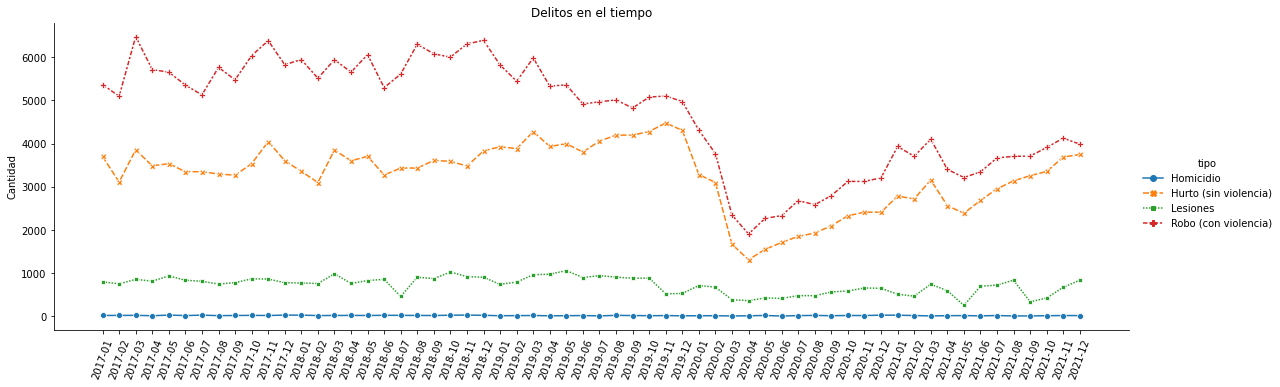

In [13]:
#La escala y dimensiones son correctas pero no se puede apreciar como fluctuaron los homicidios a travez del timepo.

fdata1 = fdata

fdata1['fecha'] = fdata1['fecha'].dt.strftime('%Y-%m')

fdata1 = fdata1.reset_index()
fdata1 = fdata1.set_index('fecha')
fdata11 = fdata1.groupby(by=['fecha','tipo']).agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata11,
            hue="tipo",
            kind="line",
            style="tipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Delitos en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()

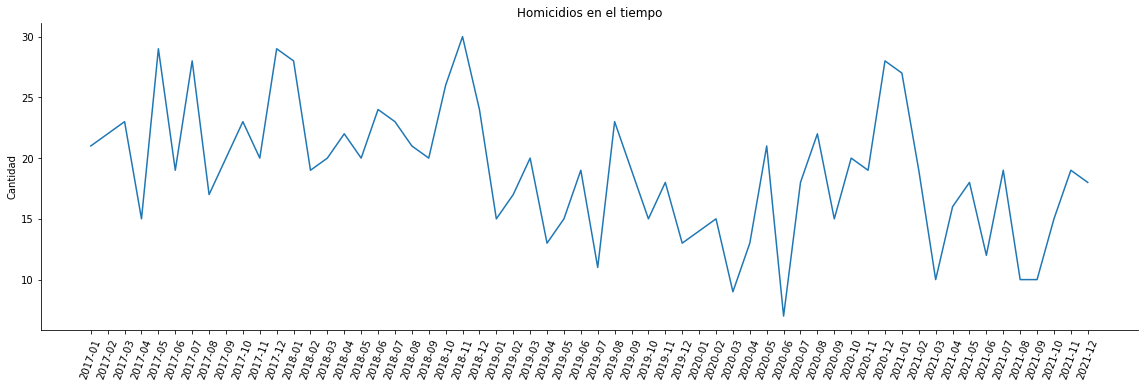

In [14]:
#Para no alterar las dimensiones y la escala, se realizo un grafico exclusivamente de homicidios para analizar su flctuacion a travez del tiempo.
#Se puede observar que al igual que, al igual que las "Lesiones", ambos delitos no han disminuido a causa de la pandemia a diferencia de los dos tipos de robos, 
#esto se podria deber a varios factores como aumento de femicidios y conflictos en los hogares com ocausa de la pandemia.


fdata12 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata12 = fdata12.groupby(by='fecha').agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata12,
            kind="line",
            height=5, aspect=3.2
).set(
    title="Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()


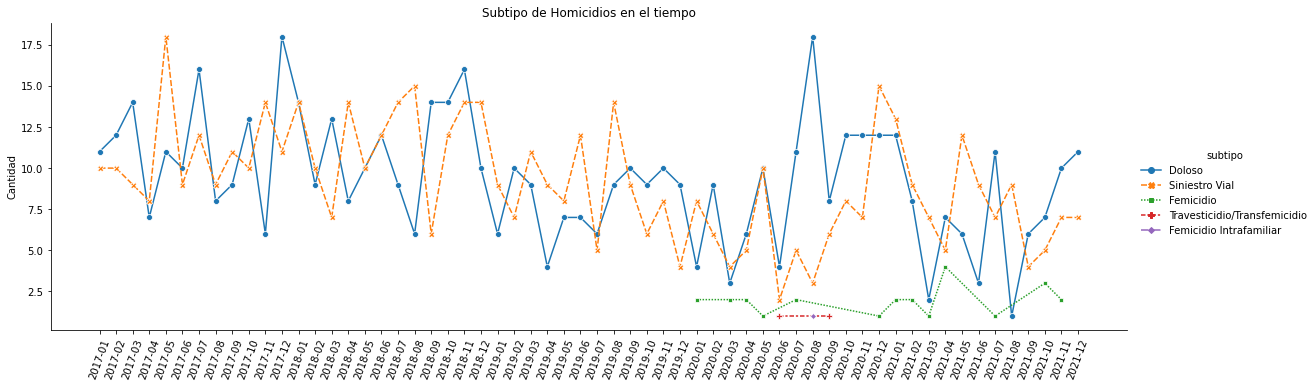

In [15]:
fdata14 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata14 = fdata14.groupby(by=['fecha','subtipo']).agg({'dia':'count'})

sns.relplot(x="fecha", y="dia",
            data=fdata14,
            hue="subtipo",
            kind="line",
            style="subtipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Subtipo de Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()


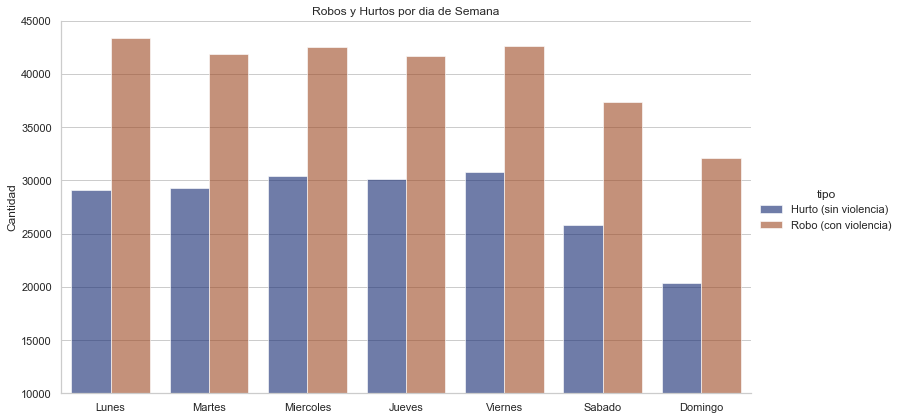

In [16]:
rob = fdata[(fdata["tipo"]=='Hurto (sin violencia)') | (fdata["tipo"]=='Robo (con violencia)')]

rob = rob.groupby(by=['dia','tipo']).agg({'año':'count'})

rob = rob.reset_index()

sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=rob, kind="bar",
    x="dia", y="año", hue="tipo",
    palette="dark", alpha=.6, height=6, aspect=1.8,
    order=("Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo")
).set(
    title="Robos y Hurtos por dia de Semana", 
    ylabel="Cantidad",
    xlabel=None
)
plt.ylim(10000, 45000)

plt.show()

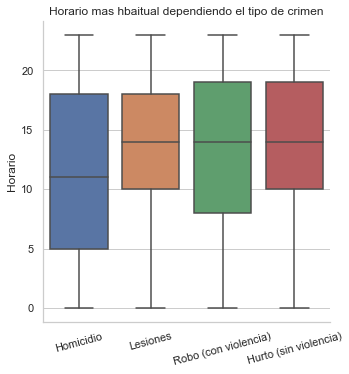

In [17]:
loly = fdata[fdata ['horas'].notna()]

pd.options.mode.chained_assignment = None

loly['horas'] = loly['horas'].astype("int")

sns.catplot(x="tipo", y="horas",
            data=loly,
            kind="box",
            whis=[0, 100]
).set(
    title="Horario mas hbaitual dependiendo el tipo de crimen", 
    ylabel="Horario",
    xlabel=None
)
plt.xticks(rotation=15)
# Show plot
plt.show()

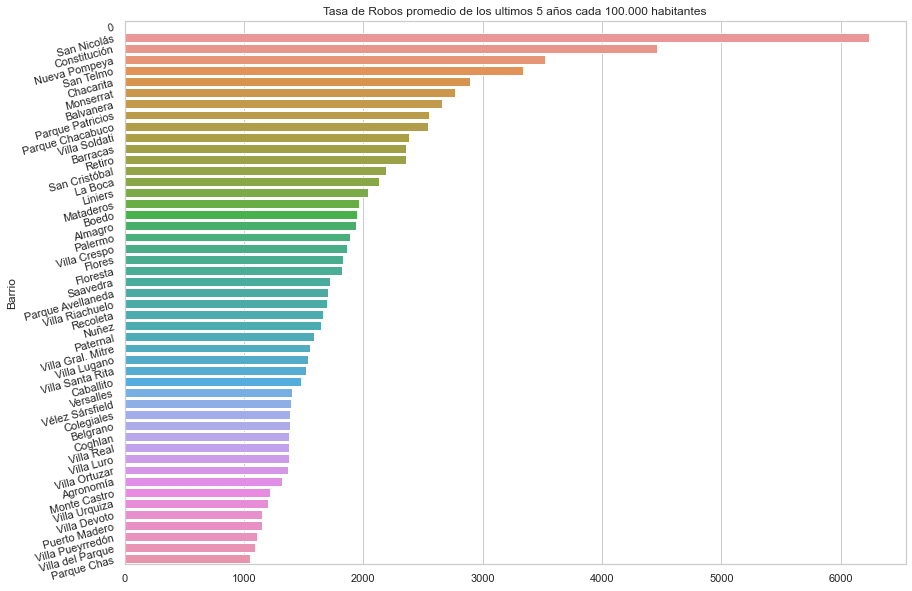

In [18]:
robos21 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos21 = robos21.loc[robos21.año == 2021]

robos21 = robos21.groupby("barrio",dropna=False).agg({"dia":"count"})


robos20 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos20 = robos20.loc[robos20.año == 2020]

robos20 = robos20.groupby("barrio").agg({"dia":"count"})


robos19 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos19 = robos19.loc[robos19.año == 2019]

robos19 = robos19.groupby("barrio").agg({"dia":"count"})


robos18 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos18 = robos18.loc[robos18.año == 2018]

robos18 = robos18.groupby("barrio").agg({"dia":"count"})


robos17 = fdata.loc[fdata.tipo == "Robo (con violencia)"]
robos17 = robos17.loc[robos17.año == 2017]

robos17 = robos17.groupby("barrio").agg({"dia":"count"})


robos = robos17.merge(robos18, how = "outer", on = "barrio", suffixes=("2017","2018")) \
                    .merge(robos19, how = "outer", on = "barrio") \
                    .merge(robos20, how = "outer", on = "barrio",suffixes=("2019","2020")) \
                    .merge(robos21, how = "outer", on = "barrio") 

robos = robos.rename(columns={'dia2017':'2017', 'dia2018':'2018', 'dia2019':'2019', 'dia2020':'2020', 'dia':'2021'})

robos = robos.reset_index()

borr = fdata.groupby("barrio").agg({"Poblacion":"min"})

borr = borr.reset_index()

robos = borr.merge(robos, how = "outer", on = "barrio")

robos = robos.fillna(0)

robos['promedio'] = robos[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

robos['Tasa de robos 100.000 promedio'] = (robos['promedio']/robos['Poblacion'])*100000

robos = robos.sort_values('Tasa de robos 100.000 promedio', ascending=False)


plt.figure(figsize=(14, 10))

sns.barplot(
    x="Tasa de robos 100.000 promedio",
    y="barrio",
    data=robos
    
).set(
    title="Tasa de Robos promedio de los ultimos 5 años cada 100.000 habitantes", 
    ylabel="Barrio",
    xlabel=None
)
    
plt.yticks(rotation=15)
plt.show()

In [19]:
robos.sort_values("Tasa de robos 100.000 promedio", ascending=False).head()

,barrio,Poblacion,2017,2018,2019,2020,2021,promedio,Tasa de robos 100.000 promedio
48,0,0.0,0.0,0.0,0.0,0.0,375,75.0,inf
31,San Nicolás,29273.0,2392.0,2503.0,2322.0,931.0,976,1824.8,6233.730742
10,Constitución,44107.0,2368.0,2297.0,2351.0,1151.0,1665,1966.4,4458.249257
18,Nueva Pompeya,42695.0,1689.0,1807.0,1751.0,1016.0,1250,1502.6,3519.381661
32,San Telmo,20453.0,894.0,848.0,793.0,353.0,530,683.6,3342.296974


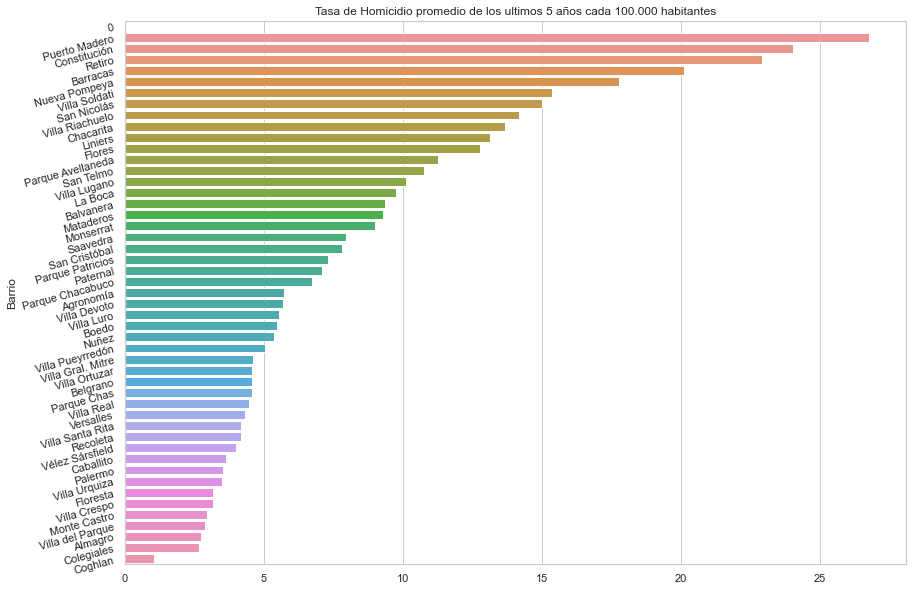

In [20]:
homic21 = fdata.loc[fdata.tipo == "Homicidio"]
homic21 = homic21.loc[homic21.año == 2021]

homic21 = homic21.groupby("barrio",dropna=False).agg({"dia":"count"})


homic20 = fdata.loc[fdata.tipo == "Homicidio"]
homic20 = homic20.loc[homic20.año == 2020]

homic20 = homic20.groupby("barrio").agg({"dia":"count"})


homic19 = fdata.loc[fdata.tipo == "Homicidio"]
homic19 = homic19.loc[homic19.año == 2019]

homic19 = homic19.groupby("barrio").agg({"dia":"count"})


homic18 = fdata.loc[fdata.tipo == "Homicidio"]
homic18 = homic18.loc[homic18.año == 2018]

homic18 = homic18.groupby("barrio").agg({"dia":"count"})


homic17 = fdata.loc[fdata.tipo == "Homicidio"]
homic17 = homic17.loc[homic17.año == 2017]

homic17 = homic17.groupby("barrio").agg({"dia":"count"})


homicidios = homic17.merge(homic18, how = "outer", on = "barrio", suffixes=("2017","2018")) \
                    .merge(homic19, how = "outer", on = "barrio") \
                    .merge(homic20, how = "outer", on = "barrio",suffixes=("2019","2020")) \
                    .merge(homic21, how = "outer", on = "barrio") 

homicidios = homicidios.rename(columns={'dia2017':'2017', 'dia2018':'2018', 'dia2019':'2019', 'dia2020':'2020', 'dia':'2021'})

homicidios = homicidios.reset_index()

barr = fdata.groupby("barrio").agg({"Poblacion":"min"})

barr = barr.reset_index()

homicidios = barr.merge(homicidios, how = "outer", on = "barrio")

homicidios = homicidios.fillna(0)

homicidios['promedio'] = homicidios[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

homicidios['Tasa de Homicidios 100.000 promedio'] = (homicidios['promedio']/homicidios['Poblacion'])*100000

homicidios = homicidios.sort_values('Tasa de Homicidios 100.000 promedio', ascending=False)


plt.figure(figsize=(14, 10))

sns.barplot(
    x="Tasa de Homicidios 100.000 promedio",
    y="barrio",
    data=homicidios
    
).set(
    title="Tasa de Homicidio promedio de los ultimos 5 años cada 100.000 habitantes", 
    ylabel="Barrio",
    xlabel=None
)
    
plt.yticks(rotation=15)
plt.show()


In [21]:
homicidios.sort_values("Tasa de Homicidios 100.000 promedio", ascending=False).head()

,barrio,Poblacion,2017,2018,2019,2020,2021,promedio,Tasa de Homicidios 100.000 promedio
48,0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,inf
26,Puerto Madero,6726.0,1.0,4.0,2.0,0.0,2.0,1.8,26.761820
10,Constitución,44107.0,12.0,11.0,7.0,16.0,7.0,10.6,24.032467
28,Retiro,65413.0,15.0,16.0,16.0,21.0,7.0,15.0,22.931222
3,Barracas,89452.0,15.0,13.0,22.0,19.0,21.0,18.0,20.122524


In [ ]:
# Los ultimos dos graficos se hicieron extrayendo la cantidad de crimenes (dependiendo el tipo) y logrando un promedio desde 2017 hasta 2021, con est epromedio se 
#realizo una reatio de criminalidad por 100.000 habitantes dependiendo el tipo de crimen a analizar.

#El dashboard completo con el analisis definitivo se encuentra en Tableau (link). Las tablas de datos que se utilizaron en Tableau fueron realizadas
#previamente en este notebook en python3.

In [22]:
# Cantidades de delitos por año y mes

gg = fdata.loc[fdata['año'].isin([2019,2020,2021])]
gg = gg.groupby(["año","mes"]).agg({"dia":"count"})

gg

dia
año  mes              
2019 Diciembre    9825
     Enero       10507
     Noviembre   10123
     Octubre     10260
     Septiembre   9926
     abril       10256
     agosto      10139
     febrero     10141
     julio        9984
     junio        9641
     marzo       11247
     mayo        10435
2020 Abril        1922
     Agosto       4650
     Diciembre    6681
     Enero        9865
     Febrero      9397
     Julio        4104
     Junio        3716
     Marzo        6033
     Mayo         3121
     Noviembre    6515
     Octubre      5740
     Septiembre   4981
2021 Abril        6583
     Agosto       7692
     Diciembre    8593
     Enero        7258
     Febrero      6916
     Julio        7366
     Junio        6741
     Marzo        8014
     Mayo         5872
     Noviembre    8509
     Octubre      7708
     Septiembre   7315

In [23]:

groupedrobos = fdata.loc[fdata.tipo == "Robo (con violencia)"]
groupedrobos = groupedrobos.groupby(["año"]).agg({"dia":"count"})
groupedrobos ["Cambio Porcentual Ratio"] = groupedrobos.dia.pct_change()
groupedrobos

,dia,Cambio Porcentual Ratio
año,,
2017,68297,NaN
2018,71121,0.041349
2019,62829,-0.116590
2020,34460,-0.451527
2021,44825,0.300784


In [24]:
groupedhomicidios = fdata.loc[fdata.tipo == "Homicidio"]
groupedhomicidios = groupedhomicidios.groupby(["año"]).agg({"dia":"count"})
groupedhomicidios ["Cambio Porcentual Ratio"] = groupedhomicidios.dia.pct_change()
groupedhomicidios

,dia,Cambio Porcentual Ratio
año,,
2017,266,NaN
2018,277,0.041353
2019,198,-0.285199
2020,201,0.015152
2021,193,-0.039801


In [4]:
# csv para exportar a Tableau 

# Tabla completa y limpiada
fdata.to_csv("/Users/oliver/Documents/Data Analyst Project/Projecto de estadistica criminal/delitoscaba.csv", index=False)


In [4]:
fdata[fdata['barrio'].isna()]

,fecha_completa,año,mes,dia,fecha,hora,tipo,subtipo,barrio,comuna,lat,long,victimas,Poblacion,horas
165,NaT,2021,Octubre,Jueves,2021-10-21,NaN,Homicidio,Femicidio,NaN,NaN,NaN,NaN,1,NaN,NaN
194,2021-01-01 07:00:00,2021,Enero,Viernes,2021-01-01,7:00:00,Lesiones,Siniestro Vial,NaN,NaN,NaN,NaN,2,NaN,7
217,2021-04-01 09:00:00,2021,Enero,Lunes,2021-01-04,9:00:00,Lesiones,Siniestro Vial,NaN,NaN,NaN,NaN,1,NaN,9
242,2021-05-01 16:00:00,2021,Enero,Martes,2021-01-05,16:00:00,Lesiones,Siniestro Vial,NaN,NaN,NaN,NaN,1,NaN,16
245,2021-05-01 14:00:00,2021,Enero,Martes,2021-01-05,14:00:00,Lesiones,Siniestro Vial,NaN,NaN,NaN,NaN,1,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521787,2017-12-30 17:00:00,2017,Diciembre,Sabado,2017-12-30,17:00:00,Robo (con violencia),NaN,NaN,NaN,NaN,NaN,1,NaN,17
521920,2017-12-30 03:00:00,2017,Diciembre,Sabado,2017-12-30,3:00:00,Robo (con violencia),NaN,NaN,NaN,NaN,NaN,1,NaN,3
521944,2017-12-30 13:00:00,2017,Diciembre,Sabado,2017-12-30,13:00:00,Robo (con violencia),NaN,NaN,NaN,NaN,NaN,1,NaN,13
521951,2017-12-30 17:00:00,2017,Diciembre,Sabado,2017-12-30,17:00:00,Robo (con violencia),NaN,NaN,NaN,NaN,NaN,1,NaN,17
